In [1]:
import pandas as pd

# Assuming your JSON data is saved in a file called 'data.json'
 # Update this to the path where your JSON file is saved
data = pd.read_json('people-counter.json')

# Convert 'time' to datetime for better plotting
data['time'] = pd.to_datetime(data['time'])

# Configure Pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame to verify all rows
display(data)

,rssi,batteryLevel,networkId,personCount,seqNumber,time,createdAt
0,-140,5.65,1FA5528,2,1237,2023-12-01 05:29:52+00:00,2023-12-01T06:19:54.066Z
1,-140,5.65,1FA5528,5,1237,2023-12-01 05:39:52+00:00,2023-12-01T06:19:54.067Z
2,-140,5.65,1FA5528,4,1237,2023-12-01 05:49:52+00:00,2023-12-01T06:19:54.067Z
3,-140,5.65,1FA5528,12,1237,2023-12-01 05:59:52+00:00,2023-12-01T06:19:54.067Z
4,-140,5.65,1FA5528,4,1237,2023-12-01 06:09:52+00:00,2023-12-01T06:19:54.067Z
5,-140,5.65,1FA5528,6,1237,2023-12-01 06:19:52+00:00,2023-12-01T06:19:54.067Z
6,-141,5.70,1FA5528,4,1238,2023-12-01 06:31:09+00:00,2023-12-01T07:21:11.173Z
7,-141,5.70,1FA5528,4,1238,2023-12-01 06:41:09+00:00,2023-12-01T07:21:11.174Z
8,-141,5.70,1FA5528,5,1238,2023-12-01 06:51:09+00:00,2023-12-01T07:21:11.174Z
9,-141,5.70,1FA5528,5,1238,2023-12-01 07:01:09+00:00,2023-12-01T07:21:11.174Z


In [3]:
#Top five rows in the dataset
data.head()

,rssi,batteryLevel,networkId,personCount,seqNumber,time,createdAt
0,-140,5.65,1FA5528,2,1237,2023-12-01 05:29:52+00:00,2023-12-01T06:19:54.066Z
1,-140,5.65,1FA5528,5,1237,2023-12-01 05:39:52+00:00,2023-12-01T06:19:54.067Z
2,-140,5.65,1FA5528,4,1237,2023-12-01 05:49:52+00:00,2023-12-01T06:19:54.067Z
3,-140,5.65,1FA5528,12,1237,2023-12-01 05:59:52+00:00,2023-12-01T06:19:54.067Z
4,-140,5.65,1FA5528,4,1237,2023-12-01 06:09:52+00:00,2023-12-01T06:19:54.067Z


In [5]:
#The info() method is useful to get a quick description of the data, in particular the
#total number of rows, each attribute’s type, and the number of nonnull values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   rssi          606 non-null    int64              
 1   batteryLevel  606 non-null    float64            
 2   networkId     606 non-null    object             
 3   personCount   606 non-null    int64              
 4   seqNumber     606 non-null    int64              
 5   time          606 non-null    datetime64[ns, UTC]
 6   createdAt     606 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(2)
memory usage: 33.3+ KB


In [7]:
 #You can find out what cate‐
#gories exist and how many districts belong to each category by using the
#value_counts() method:
data["personCount"].value_counts()

personCount
0      167
1       75
3       56
4       54
2       39
6       24
8       22
5       19
10      16
9       15
7       14
12       7
11       6
13       5
14       5
15       4
16       4
43       3
18       3
17       3
30       2
26       2
160      2
180      2
28       2
47       1
32       1
25       1
277      1
58       1
20       1
51       1
256      1
224      1
323      1
94       1
93       1
89       1
184      1
494      1
37       1
35       1
103      1
156      1
175      1
299      1
315      1
78       1
76       1
52       1
306      1
292      1
29       1
71       1
19       1
265      1
86       1
36       1
138      1
192      1
500      1
509      1
593      1
632      1
553      1
576      1
74       1
24       1
50       1
91       1
200      1
286      1
223      1
373      1
384      1
135      1
275      1
339      1
257      1
64       1
Name: count, dtype: int64

In [13]:
 #You can find out what cate‐
#gories exist and how many districts belong to each category by using the
#value_counts() method:
data["batteryLevel"].value_counts()

batteryLevel
5.85    84
5.80    48
5.75    42
5.50    36
5.90    36
5.95    36
5.65    30
5.55    24
5.60    24
5.40    24
5.45    24
4.35    18
5.70    18
4.10    18
4.55    18
4.45    18
4.50    12
4.25    12
4.15    12
4.65    12
4.40    12
5.30     6
4.95     6
5.05     6
5.15     6
5.20     6
5.35     6
5.25     6
4.05     6
Name: count, dtype: int64

In [2]:
#The describe() method shows a summary of the numerical attributes
data.describe()

,rssi,batteryLevel,personCount,seqNumber
count,606.000000,606.000000,606.00000,606.000000
mean,-140.069307,5.371782,23.10396,1562.841584
std,2.735469,0.590521,77.89767,283.835795
min,-144.000000,4.050000,0.00000,1237.000000
25%,-141.000000,5.150000,0.00000,1282.000000
50%,-141.000000,5.600000,3.00000,1498.000000
75%,-140.000000,5.850000,8.00000,1773.000000
max,-126.000000,5.950000,632.00000,2017.000000


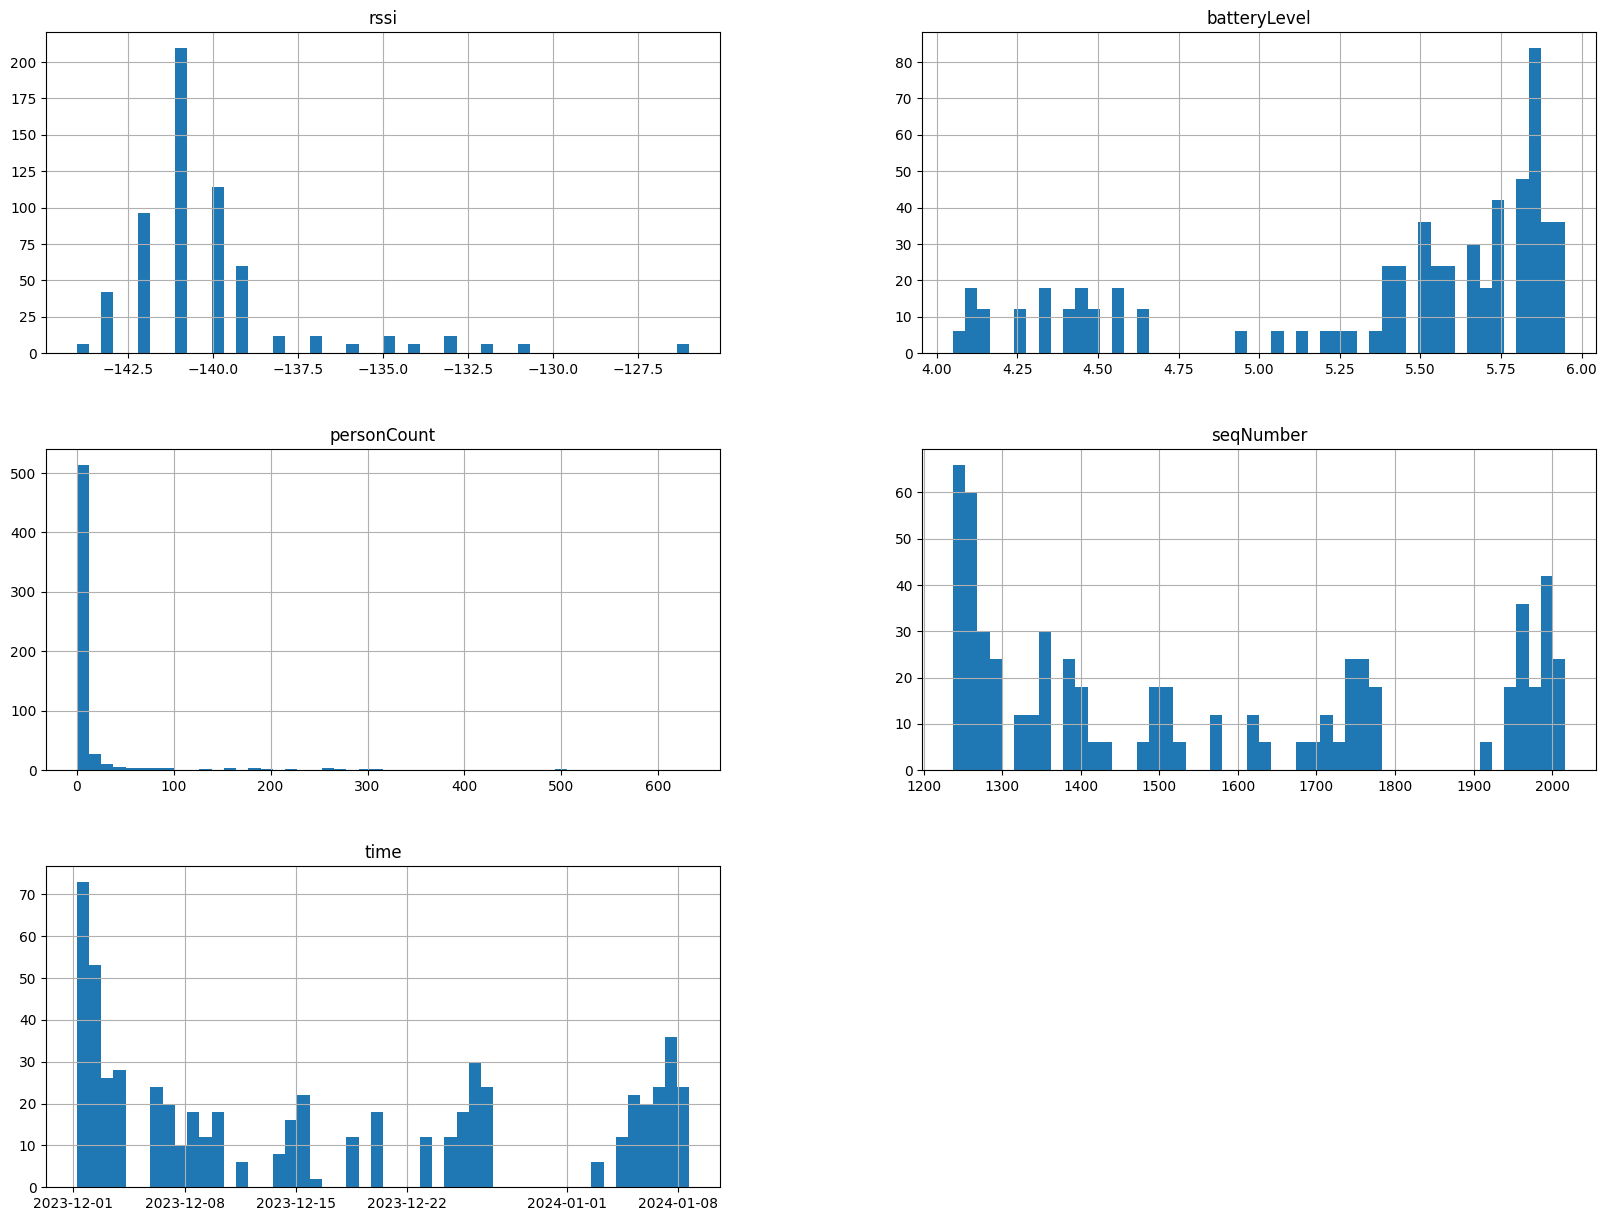

In [11]:
# plot a histogram for each numerical attribute.
#the hist() method on the whole dataset
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()


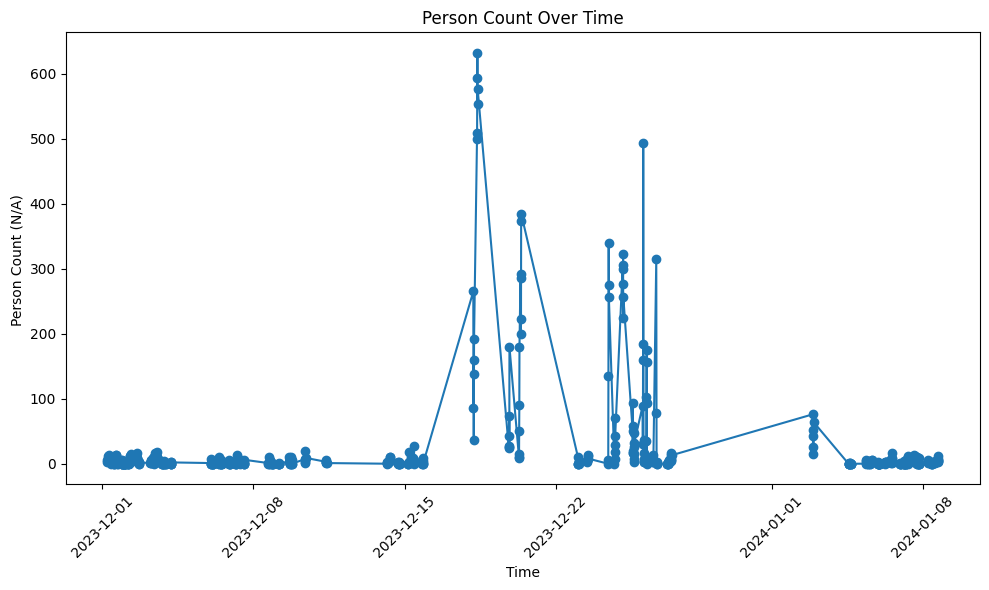

In [3]:
# Visualizing  Data: plot for Person Count
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['personCount'], marker='o')
plt.title('Person Count Over Time')
plt.xlabel('Time')
plt.ylabel('Person Count (N/A) ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

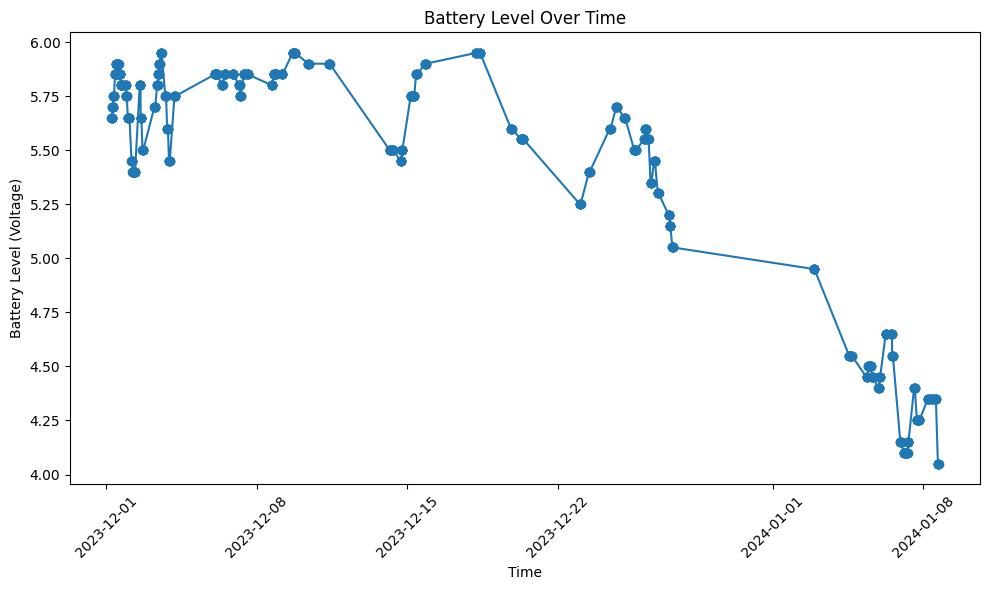

In [2]:
# Visualizing  Data: plot for Battery Level
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['batteryLevel'], marker='o')
plt.title('Battery Level Over Time')
plt.xlabel('Time')
plt.ylabel('Battery Level (Voltage)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([19692., 19699., 19706., 19713., 19723., 19730.]),
 [Text(19692.0, 0, '2023-12-01'),
  Text(19699.0, 0, '2023-12-08'),
  Text(19706.0, 0, '2023-12-15'),
  Text(19713.0, 0, '2023-12-22'),
  Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08')])

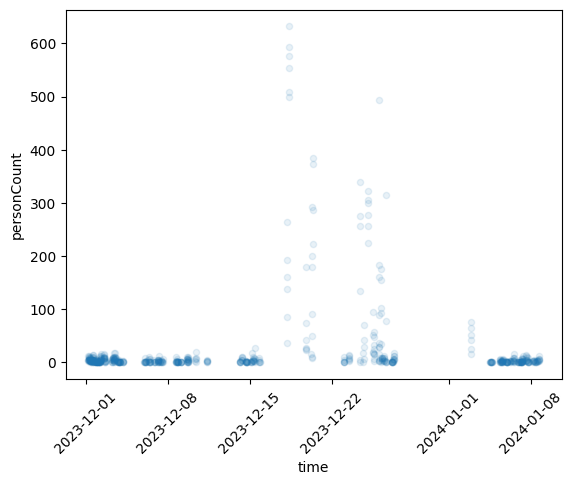

In [19]:
#Visualizing  Data
#create a scatterplot of all districts to visualize the data
#Setting the alpha option to 0.1 makes it much easier to visualize the places
#where there is a high density of data points
data.plot(kind="scatter", x="time", y="personCount",alpha=0.1)
plt.xticks(rotation=45)

(array([19692., 19699., 19706., 19713., 19723., 19730.]),
 [Text(19692.0, 0, '2023-12-01'),
  Text(19699.0, 0, '2023-12-08'),
  Text(19706.0, 0, '2023-12-15'),
  Text(19713.0, 0, '2023-12-22'),
  Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08')])

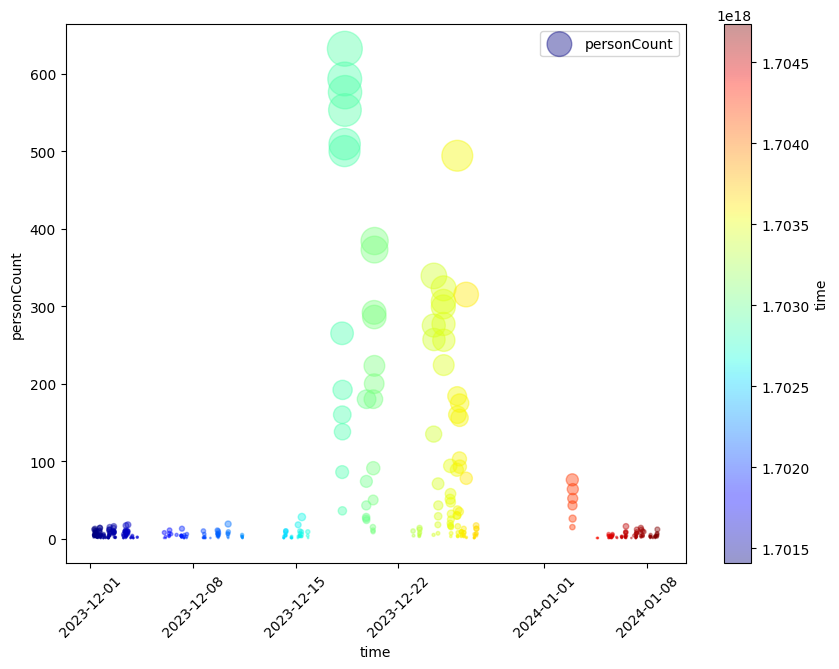

In [25]:
data.plot(kind="scatter", x="time", y="personCount", alpha=0.4,
 s=data["personCount"], label="personCount", figsize=(10,7),
 c="time", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.xticks(rotation=45)

In [31]:
#Looking for Correlations
#The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
#there is a strong positive correlation. When the coefficient is close to –1, it means
#that there is a strong negative correlation;
import pandas as pd

# Assuming 'data' is your DataFrame
for col in data.columns:
    # Attempt to convert each column to numeric, coercing errors to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Now you can retry computing the correlation matrix
corr_matrix = data.corr()
print(corr_matrix["personCount"].sort_values(ascending=False))



personCount     1.000000
batteryLevel    0.142383
seqNumber       0.083849
time            0.082605
rssi           -0.084640
networkId            NaN
createdAt            NaN
Name: personCount, dtype: float64


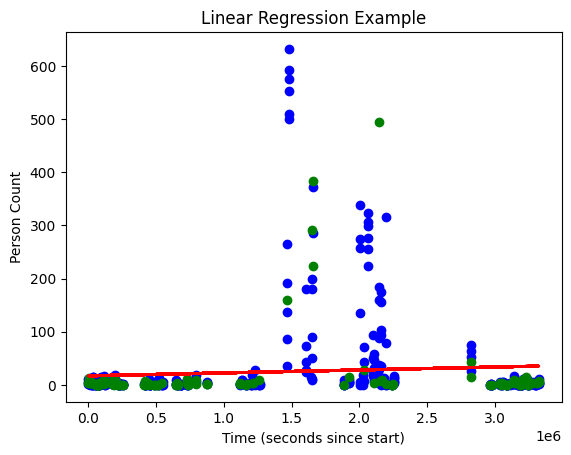

In [102]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Convert 'time' to a numerical value (e.g., seconds since the first timestamp)
data['time'] = pd.to_datetime(data['time'])
data['time'] = (data['time'] - data['time'].min()).dt.total_seconds()

# Prepare the data for linear regression
X = data[['time']]  # Feature matrix
y = data['personCount']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Optional: Plot the results
plt.scatter(X_train, y_train, color='blue')#80%
plt.scatter(X_test, y_test, color='green')#20%
plt.plot(X_test, y_pred, color='red', linewidth=2)#predict

plt.xlabel('Time (seconds since start)')
plt.ylabel('Person Count')
plt.title('Linear Regression Example')
plt.show()


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = pd.read_json('people-counter.json')  # Update the path to your JSON file

# Convert 'time' to numerical feature, e.g., hour of the day
data['hour'] = pd.to_datetime(data['time']).dt.hour

# Define features and target variable
X = data[['hour']]  # You might need to adjust or add more features
y = data['personCount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


# Predict on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate the mean squared error (MSE) or any other relevant metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error (RMSE) for a more interpretable metric
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 4923.763418999954
Root Mean Squared Error: 70.16953341016281
